## Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 

Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.


## 1) Get familiar with data

In [6]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
s=pd.read_csv("./searches.csv.bz2", sep="^", nrows=10000)

In [4]:
s.shape

(10000, 45)

In [7]:
s.sample(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
1994,2013-01-02,23:46:18,MPT,b695299cc14ddcd1e31f1c922b3e258c,US,CAI,FCO,1,2,CAI,FCO,2013-05-27,NaN,NaN,FCO,CAI,2013-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SJC
6263,2013-01-07,16:37:53,MPT,3561a60621de06ab1badc8ca55699ef3,US,NOC,ORK,0,1,NOC,ORK,2013-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3146,2013-01-04,21:01:52,MPT,50c54b52322080d2c257390f714f91bd,ES,LIM,MAD,0,1,LIM,MAD,2013-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD
1057,2013-01-02,14:40:05,FXA,bc762a7f5bad22cb119ca8c063f2a8b1,DE,MXP,ZRH,0,2,MXP,ZRH,2013-01-30,VI,J,ZRH,MUC,2013-01-30,VI,J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,e2d207cf822edf1ce8d5654c98b00830,FRA
8926,2013-01-09,01:25:25,MTP,236cbf458f79dbb9d5e9c9430438c3db,US,RAP,GCM,1,2,RAP,GCM,2013-05-31,NaN,NaN,GCM,RAP,2013-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN


In [10]:
s.describe(include="all")

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
count,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,9973,4047,1143,7196,7196,7161,2870,998,534,534,531,517,508,440,440,439,438,436,103,103,103,103,103,58,58,58,58,58,9925,10000.0,10000.0,10000.0,10000,10000
unique,10,9373,33,1321,104,896,1055,NaN,NaN,896,1046,361,189,27,861,708,361,174,27,225,169,210,89,27,131,160,189,79,26,54,57,82,41,15,35,50,52,30,12,7,NaN,NaN,NaN,864,284
top,2013-01-05,15:49:57,MPT,440642a9bdaeb6287f826cefd73255e8,US,FRA,BKK,NaN,NaN,FRA,BKK,2013-01-11,7V,J,BKK,FRA,2013-01-27,7V,J,JFK,IST,2013-01-26,VR,J,IST,FRA,2013-02-01,VR,J,FRA,AMS,2013-02-22,LK,J,AMS,TXL,2013-02-17,UV,J,1ASIWS,NaN,NaN,NaN,d41d8cd98f00b204e9800998ecf8427e,HPN
freq,1000,3,5821,795,2523,384,268,NaN,NaN,384,269,184,382,331,242,292,90,228,290,13,29,10,46,159,28,38,10,41,141,8,8,4,10,38,8,4,2,6,27,6451,NaN,NaN,NaN,9124,1074
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700700,1.833600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.457974,0.731823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN


In [12]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
Date                 10000 non-null object
Time                 10000 non-null object
TxnCode              10000 non-null object
OfficeID             10000 non-null object
Country              10000 non-null object
Origin               10000 non-null object
Destination          10000 non-null object
RoundTrip            10000 non-null int64
NbSegments           10000 non-null int64
Seg1Departure        10000 non-null object
Seg1Arrival          10000 non-null object
Seg1Date             9973 non-null object
Seg1Carrier          4047 non-null object
Seg1BookingCode      1143 non-null object
Seg2Departure        7196 non-null object
Seg2Arrival          7196 non-null object
Seg2Date             7161 non-null object
Seg2Carrier          2870 non-null object
Seg2BookingCode      998 non-null object
Seg3Departure        534 non-null object
Seg3Arrival          534 non-null object
Seg3

In [13]:
list(s.columns)

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

In [16]:
s.isnull().sum()

Date                    0
Time                    0
TxnCode                 0
OfficeID                0
Country                 0
Origin                  0
Destination             0
RoundTrip               0
NbSegments              0
Seg1Departure           0
Seg1Arrival             0
Seg1Date               27
Seg1Carrier          5953
Seg1BookingCode      8857
Seg2Departure        2804
Seg2Arrival          2804
Seg2Date             2839
Seg2Carrier          7130
Seg2BookingCode      9002
Seg3Departure        9466
Seg3Arrival          9466
Seg3Date             9469
Seg3Carrier          9483
Seg3BookingCode      9492
Seg4Departure        9560
Seg4Arrival          9560
Seg4Date             9561
Seg4Carrier          9562
Seg4BookingCode      9564
Seg5Departure        9897
Seg5Arrival          9897
Seg5Date             9897
Seg5Carrier          9897
Seg5BookingCode      9897
Seg6Departure        9942
Seg6Arrival          9942
Seg6Date             9942
Seg6Carrier          9942
Seg6BookingC

## 2) Select the columns of interest

## 3) What to do with NaN

In [19]:
#Destination, Date
s=pd.read_csv("./searches.csv.bz2", usecols=["Date", "Destination"],  sep="^", nrows=10000)
s=s.dropna()

In [20]:
s.head()

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


In [21]:
s["Destination"][0]

'AUH'

In [22]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Date           10000 non-null object
Destination    10000 non-null object
dtypes: object(2)
memory usage: 554.4+ KB


## 4) Make action plan


In [ ]:
1) filtrar por 3 aeropuertos
2) tranformar la fecha a fecha (string)
3) sacar el ano-mes sobreescribiendo en la misma columna 
4) groupby sobre  ano-mes y destination
5) count (size)
-------
6) plot



In [25]:
s=pd.read_csv("./searches.csv.bz2", usecols=["Date", "Destination"],  sep="^", parse_dates=["Date"], nrows=10000)

In [27]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Date           10000 non-null datetime64[ns]
Destination    10000 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 156.3+ KB


In [29]:
s=s[ (s['Destination']=="MAD") | (s['Destination']=="BCN") |(s['Destination']=="AGP")   ]

In [31]:
s2=s[   s['Destination'].isin(["MAD","BCN", "AGP"])     ].copy()

In [ ]:
#ejemplo de warning de slice

In [32]:
df=pd.DataFrame({'x':[1,2]})

In [33]:
df

,x
0,1
1,2


In [34]:
df_sub=df[0:1]

In [35]:
df_sub

,x
0,1


In [36]:
df_sub.x=-1

/home/dsc/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [37]:
df

,x
0,-1
1,2


In [ ]:
#string

In [38]:
a="this is string"

In [39]:
a[:3]

'thi'

In [44]:

s.head()

,Date,Destination,Year-Date
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


In [ ]:
#utilizando to_datetime
s=pd.read_csv("./searches.csv.bz2", usecols=["Date", "Destination"],  sep="^",  nrows=10000)
s=s.dropna()
s=s[   s['Destination'].isin(["MAD","BCN", "AGP"])     ]
s['Date']=pd.to_datetime(s['Date'])

In [48]:
#utilizando string con 2 columnas
s=pd.read_csv("./searches.csv.bz2", usecols=["Date", "Destination"],  sep="^",  nrows=10000)
s=s.dropna()
s=s[   s['Destination'].isin(["MAD","BCN", "AGP"])     ]
s['Date']=s['Date'].str[:7]

In [49]:
s.head()

,Date,Destination
4,2013-01,MAD
93,2013-01,AGP
113,2013-01,BCN
147,2013-01,AGP
151,2013-01,MAD


In [50]:
s_gr=s.groupby(["Date", "Destination"]).count()

In [56]:
s_gr=s.groupby(["Date", "Destination"]).size()
s_gr

Date     Destination
2013-01  AGP             48
         BCN            162
         MAD            125
dtype: int64

In [53]:
s_gr=s.groupby(["Date", "Destination"])['Destination'].count()

In [54]:
s_gr

Date     Destination
2013-01  AGP             48
         BCN            162
         MAD            125
Name: Destination, dtype: int64

In [51]:
s_gr

Empty DataFrame
Columns: []
Index: [(2013-01, AGP), (2013-01, BCN), (2013-01, MAD)]

In [61]:
#utilizando string con 3 columnas
s=pd.read_csv("./searches.csv.bz2", usecols=["Date", "Destination"],  sep="^",  nrows=10000)
s=s.dropna()
s=s[   s['Destination'].isin(["MAD","BCN", "AGP"])     ]
s['Year-Month']=s['Date'].str[:7]

In [62]:
s.head()

,Date,Destination,Year-Month
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


In [63]:
s_gr=s.groupby(["Year-Month", "Destination"]).count()
s_gr

Date
Year-Month Destination      
2013-01    AGP            48
           BCN           162
           MAD           125

In [64]:
s_gr=s.groupby(["Year-Month", "Destination"]).count().reset_index()
s_gr

,Year-Month,Destination,Date
0,2013-01,AGP,48
1,2013-01,BCN,162
2,2013-01,MAD,125


In [65]:
#utilizando string con 3 columnas
s=pd.read_csv("./searches.csv.bz2", usecols=["Date", "Destination"],  sep="^",  nrows=100000)
s=s.dropna()
s=s[   s['Destination'].isin(["MAD","BCN", "AGP"])     ]
s['Year-Month']=s['Date'].str[:7]
s_gr=s.groupby(["Year-Month", "Destination"]).count().reset_index()
s_gr

,Year-Month,Destination,Date
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497
5,2013-02,MAD,400
6,2013-03,AGP,187
7,2013-03,BCN,536
8,2013-03,MAD,433
9,2013-04,AGP,31


In [66]:
s_gr=s_gr.rename(columns={'Date':'Count'})

In [67]:
plot_ready=s_gr.pivot('Year-Month', 'Destination', 'Count')

In [68]:
type(plot_ready)

pandas.core.frame.DataFrame

In [69]:
plot_ready

Destination,AGP,BCN,MAD
Year-Month,,,
2013-01,169,517,425
2013-02,147,497,400
2013-03,187,536,433
2013-04,31,174,147


In [70]:
%matplotlib inline

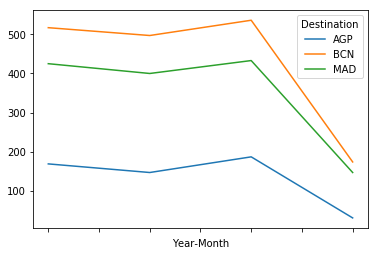

In [71]:
plot_ready.plot()

## 5) Adjust the code to work with Big data

0
1
2
3


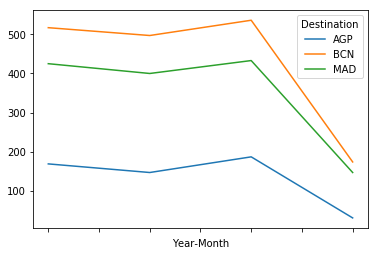

In [79]:
#utilizando string con 3 columnas
import pandas as pd
%matplotlib inline

all_chunks=pd.DataFrame()
si=pd.read_csv("./searches.csv.bz2", usecols=["Date", "Destination"],  sep="^", chunksize=30000, nrows=100000 )

for i, s in enumerate(si):
    print(i)
    s=s.dropna()
    s=s[   s['Destination'].isin(["MAD","BCN", "AGP"])     ]
    s['Year-Month']=s['Date'].str[:7]
    s_gr=s.groupby(["Year-Month", "Destination"]).count().reset_index()
    all_chunks=all_chunks.append(s_gr)

all_chunks_gr=all_chunks.groupby(["Year-Month", "Destination"]).sum().reset_index()

all_chunks_gr=all_chunks_gr.rename(columns={'Date':'Count'})
plot_ready=all_chunks_gr.pivot('Year-Month', 'Destination', 'Count')
plot_ready.plot()

In [78]:
all_chunks_gr

,Year-Month,Destination,Date
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497
5,2013-02,MAD,400
6,2013-03,AGP,187
7,2013-03,BCN,536
8,2013-03,MAD,433
9,2013-04,AGP,31


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
CPU times: user 5min 49s, sys: 3.63 s, total: 5min 52s
Wall time: 5min 49s


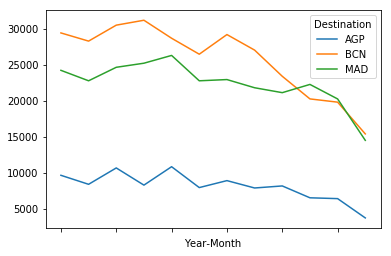

In [80]:
%%time
import pandas as pd
%matplotlib inline

all_chunks=pd.DataFrame()
si=pd.read_csv("./searches.csv.bz2", usecols=["Date", "Destination"],  sep="^", chunksize=1000000 )

for i, s in enumerate(si):
    print(i)
    s=s.dropna()
    s=s[   s['Destination'].isin(["MAD","BCN", "AGP"])     ]
    s['Year-Month']=s['Date'].str[:7]
    s_gr=s.groupby(["Year-Month", "Destination"]).count().reset_index()
    all_chunks=all_chunks.append(s_gr)

all_chunks_gr=all_chunks.groupby(["Year-Month", "Destination"]).sum().reset_index()

all_chunks_gr=all_chunks_gr.rename(columns={'Date':'Count'})
plot_ready=all_chunks_gr.pivot('Year-Month', 'Destination', 'Count')
plot_ready.plot()